In [ ]:
# Visualize and compare the LSTM models using 
# (1) data from all channels (all channels)
# (2) data from channels in sensory and motor cortical areas (selcted channels)
# (3) selected channels + filtered data for beta rhythms (10-50 Hz) (filtered + selected channels)

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load data
dataDir = '/Users/yiting/Desktop/ECoG_project/ECoG_results'

obj_all_cha = pd.read_pickle(os.path.join(dataDir,'results_lstm_all_channels_20_units_p18_dropout_12_epochs'))
obj_sel_cha = pd.read_pickle(os.path.join(dataDir,'results_lstm_selected_channels_20_units_p18_dropout_14_epochs'))
obj_sel_cha_fil = pd.read_pickle(os.path.join(dataDir,'results_lstm_selected_channels_filtered_300_units_p15_dropout_16_epochs'))



In [4]:
keylist = list(obj_all_cha.keys())
keylist

['y_test_all',
 'y_valid_all',
 'y_train_all',
 'mean_r2_lstm',
 'y_pred_lstm_all',
 'y_train_pred_lstm_all',
 'y_valid_pred_lstm_all',
 'X',
 'Y']

In [1]:
def get_R2(y_test,y_test_pred):

    """
    Function to get R2

    Parameters
    ----------
    y_test - the true outputs (a matrix of size number of examples x number of outputs)
    y_test_pred - the predicted outputs (a matrix of size number of examples x number of outputs)

    Returns
    -------
    R2_array: An array of R2s for each output
    """

    R2_list=[] #Initialize a list that will contain the R2s for all the outputs
    for i in range(y_test.shape[1]): #Loop through outputs
        #Compute R2 for each output
        y_mean=np.mean(y_test[:,i])
        R2=1-np.sum((y_test_pred[:,i]-y_test[:,i])**2)/np.sum((y_test[:,i]-y_mean)**2)
        R2_list.append(R2) #Append R2 of this output to the list
    R2_array=np.array(R2_list)
    return R2_array #Return an array of R2s

In [ ]:
# Check for overfitting
# Train vs Test data
# 

In [23]:
# Calculate mean R2 of 10-fold cross validation for the train data
all_data = [obj_all_cha, obj_sel_cha, obj_sel_cha_fil]
data_names = ['all channels', 'selected channels', 'selected channels + filtered signal']
for index,(data,name) in enumerate(zip(all_data, data_names)):
    # Get mean R2 for each folds
    numFolds = len(data['y_train_all'])
    numOutputs = data['y_train_all'][0].shape[1]
    R2_train_folds = np.empty((numFolds,numOutputs)) # row: folds, column: outputs
    for f, (train, pred) in enumerate(zip(data['y_train_all'], data['y_train_pred_lstm_all'])):                              
        R2_train_folds[f,:] = get_R2(train, pred)
    print('R2 of', name, ' : ' ,round(np.mean(R2_train_folds),2))


R2 of all channels  :  0.62
R2 of selected channels  :  0.6
R2 of selected channels + filtered signal  :  -0.07


In [7]:
# Calculate mean R2 of 10-fold cross validation for the test data
all_data = [obj_all_cha, obj_sel_cha, obj_sel_cha_fil]
data_names = ['all channels', 'selected channels', 'selected channels + filtered signal']
for index,(data,name) in enumerate(zip(all_data, data_names)):
    print('R2 of', name, ' : ' ,round(np.mean(data['mean_r2_lstm']),2))


R2 of all channels  :  0.19
R2 of selected channels  :  0.22
R2 of selected channels + filtered signal  :  -0.21


In [8]:
# Accuracy
# If the distance between the true curosr location and the prediction is than the threshold,
# it is considered as correct.
acc_thres = 0.2 # accuracy threshold 
for index,(data,name) in enumerate(zip(all_data, data_names)):
    numFold = len(data['y_test_all'])
    accuracy = np.empty([numFold,1])
    for j in range(numFold):
        # Distance between predictions and true cursor location
        x_diff = data['y_pred_lstm_all'][j][:,0] - data['y_test_all'][j][:,0] # x_pred - x_true
        y_diff = data['y_pred_lstm_all'][j][:,1] - data['y_test_all'][j][:,1] # y_pred - y_true
        distance = np.linalg.norm(np.array([x_diff, y_diff]), axis=0)
        # Calculate the accuracy for the current fold
        accuracy[j] = round(np.sum(distance < acc_thres)/len(distance),3) 
    # Average accuracy across cross-validation folds
    print('Accuracy of', name, ' : ' ,round(np.mean(accuracy),2))


Accuracy of all channels  :  0.28
Accuracy of selected channels  :  0.28
Accuracy of selected channels + filtered signal  :  0.1


<Figure size 1440x1152 with 0 Axes>

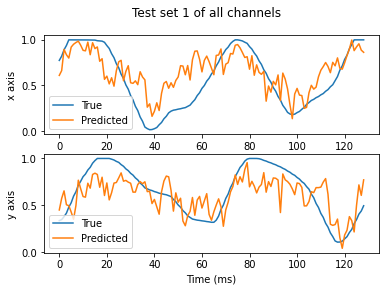

<Figure size 1440x1152 with 0 Axes>

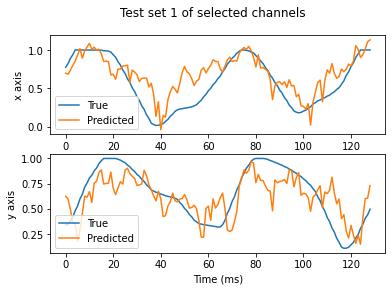

<Figure size 1440x1152 with 0 Axes>

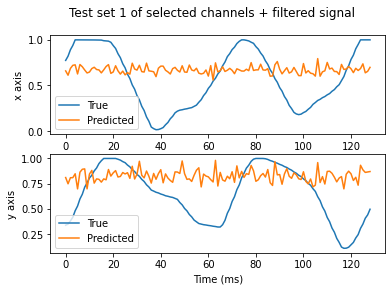

In [20]:
# Plot figures 
# 
ylabel_names = ['x axis', 'y axis']
for index,(data,name) in enumerate(zip(all_data, data_names)):
    plt.figure(figsize=(20, 16))
    fig, axs = plt.subplots(2)
    fig.suptitle('Test set 1 of ' + name)
    for j,ylabel_name in enumerate(ylabel_names): 
        axs[j].plot(data['y_test_all'][0][:,j])
        axs[j].plot(data['y_pred_lstm_all'][0][:,j])
        axs[j].set_xlabel('Time (ms)')
        axs[j].set_ylabel(ylabel_name)
        axs[j].legend(['True', 'Predicted'],loc="lower left")
        


<Figure size 1440x1440 with 0 Axes>

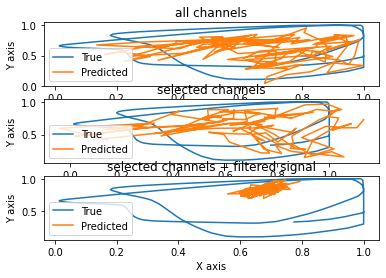

In [26]:
 # Plot figures 
# 
plt.figure(figsize=(20, 20))
fig.suptitle('Test set 1')
fig, axs = plt.subplots(3)
for i,(data,name) in enumerate(zip(all_data, data_names)):
    axs[i].set_title(name)
    axs[i].plot(data['y_test_all'][0][:,0], data['y_test_all'][0][:,1])
    axs[i].plot(data['y_pred_lstm_all'][0][:,0], data['y_pred_lstm_all'][0][:,1])
    axs[i].set_xlabel('X axis')
    axs[i].set_ylabel('Y axis')
    axs[i].legend(['True', 'Predicted'],loc="lower left")